In [ ]:
conn = psycopg2.connect(
    dbname="nyc_housing_analysis",
    user="postgres",
    password="Fungywayaz1",
    host="localhost",
    port="5432"
)

In [ ]:
try:
    cur = conn.cursor()
    cur.execute("SELECT version();")
    print("Connected successfully to:", cur.fetchone())
except Exception as e:
    print("Connection failed:", e)


In [ ]:
# Load all three tables
violations_df = pd.read_sql("SELECT * FROM housing_violations;", conn)
requests_df = pd.read_sql("SELECT * FROM service_requests_311;", conn)
population_df = pd.read_sql("SELECT * FROM population_forecast;", conn)

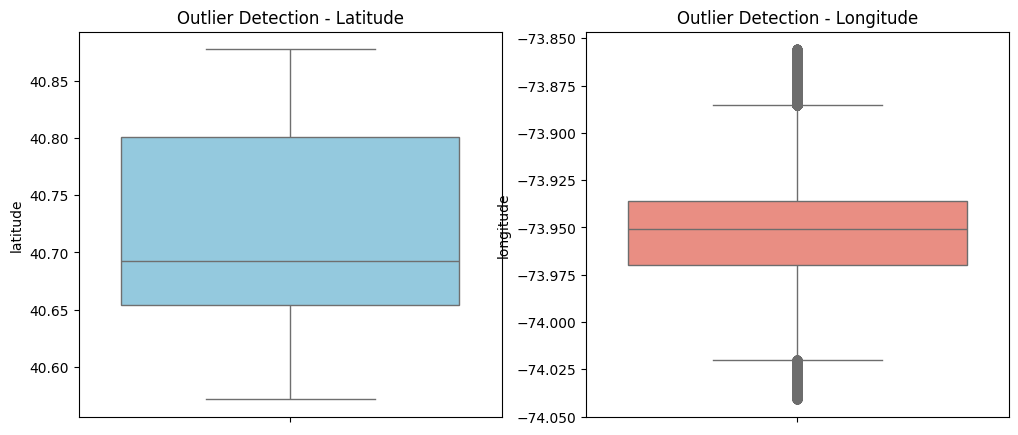

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots for latitude and longitude
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(y=requests_df['latitude'], color='skyblue')
plt.title('Outlier Detection - Latitude')

plt.subplot(1,2,2)
sns.boxplot(y=requests_df['longitude'], color='salmon')
plt.title('Outlier Detection - Longitude')

plt.show()


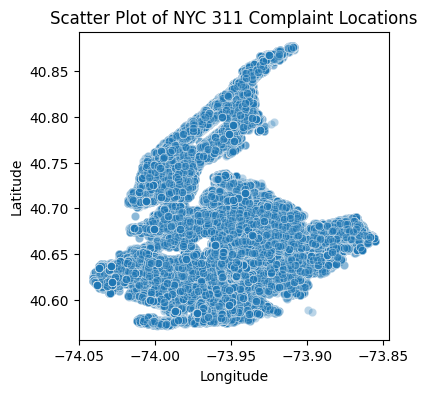

In [26]:
plt.figure(figsize=(4,4))
sns.scatterplot(x='longitude', y='latitude', data=requests_df, alpha=0.3)
plt.title('Scatter Plot of NYC 311 Complaint Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

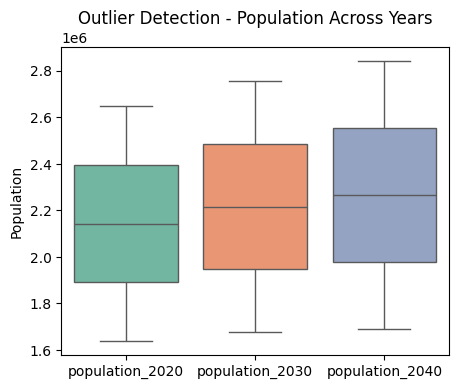

In [27]:
plt.figure(figsize=(5,4))
sns.boxplot(data=population_df[['population_2020', 'population_2030', 'population_2040']], palette='Set2')
plt.title('Outlier Detection - Population Across Years')
plt.ylabel('Population')
plt.show()

Latitude & Longitude (Boxplots + Scatter Plot)

The boxplots show very few outliers — only a handful of points outside NYC’s geographic range.

The scatter plot confirms that almost all data points fall nicely within the NYC map boundaries (40.6–40.9°N and −74.05–−73.85°W).
 Conclusion: No major cleaning needed. You can keep these rows or remove <1% extreme points if you want slightly cleaner visuals.

C:\Users\siddu\AppData\Local\Temp\ipykernel_20928\2782500666.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  violations = pd.read_sql(query1, conn)
C:\Users\siddu\AppData\Local\Temp\ipykernel_20928\2782500666.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='borough', y='total_violations', data=violations, palette='Blues_d')


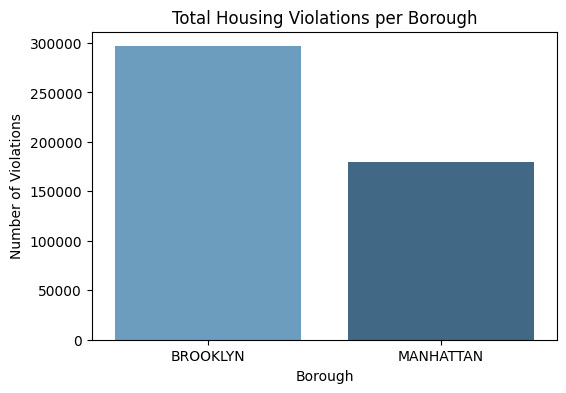

In [28]:
query1 = """
SELECT borough, COUNT(*) AS total_violations
FROM housing_violations
GROUP BY borough
ORDER BY total_violations DESC;
"""
violations = pd.read_sql(query1, conn)

# Bar chart
plt.figure(figsize=(6,4))
sns.barplot(x='borough', y='total_violations', data=violations, palette='Blues_d')
plt.title("Total Housing Violations per Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Violations")
plt.show()

Brooklyn has significantly higher violations than Manhattan, likely due to its larger housing stock and older buildings.

C:\Users\siddu\AppData\Local\Temp\ipykernel_20928\2645412779.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  complaints = pd.read_sql(query2, conn)
C:\Users\siddu\AppData\Local\Temp\ipykernel_20928\2645412779.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='complaint_type', y='total_complaints', data=complaints, palette='Oranges_d')


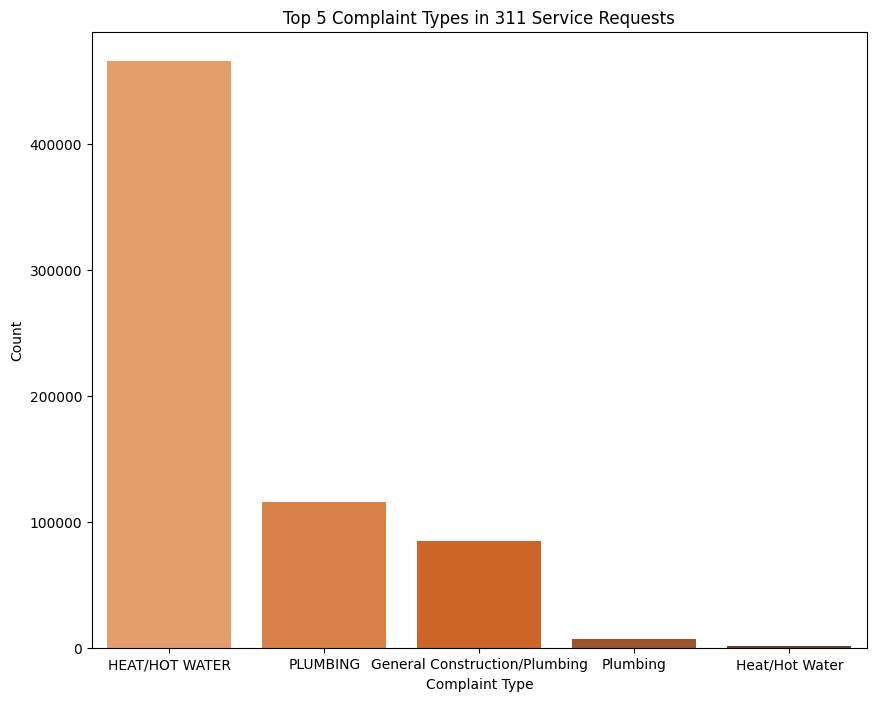

In [29]:
query2 = """
SELECT complaint_type, COUNT(*) AS total_complaints
FROM service_requests_311
GROUP BY complaint_type
ORDER BY total_complaints DESC
LIMIT 5;
"""
complaints = pd.read_sql(query2, conn)

plt.figure(figsize=(10,8))
sns.barplot(x='complaint_type', y='total_complaints', data=complaints, palette='Oranges_d')
plt.title("Top 5 Complaint Types in 311 Service Requests")
plt.xlabel("Complaint Type")
plt.ylabel("Count")
plt.show()


“HEAT/HOT WATER” dominates complaints, consistent with winter season reporting trends.

C:\Users\siddu\AppData\Local\Temp\ipykernel_20928\222776236.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  complaints_rate = pd.read_sql(query3, conn)
C:\Users\siddu\AppData\Local\Temp\ipykernel_20928\222776236.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='borough', y='complaints_per_100k', data=complaints_rate, palette='Greens_d')


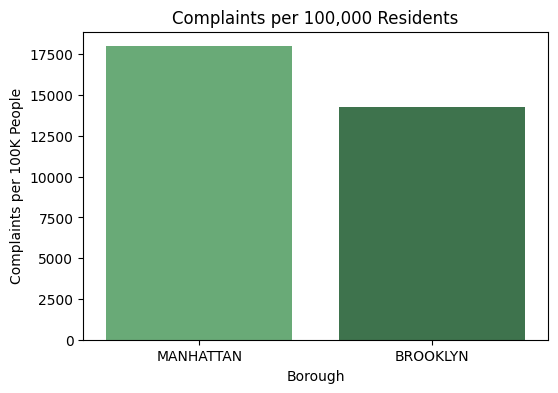

In [30]:
query3 = """
SELECT 
    p.borough,
    COUNT(DISTINCT s.unique_key) AS total_complaints,
    p.population_2020,
    ROUND(COUNT(DISTINCT s.unique_key)::NUMERIC / p.population_2020 * 100000, 2) AS complaints_per_100k
FROM service_requests_311 s
JOIN population_forecast p
    ON s.borough = p.borough
GROUP BY p.borough, p.population_2020
ORDER BY complaints_per_100k DESC;
"""
complaints_rate = pd.read_sql(query3, conn)

plt.figure(figsize=(6,4))
sns.barplot(x='borough', y='complaints_per_100k', data=complaints_rate, palette='Greens_d')
plt.title("Complaints per 100,000 Residents")
plt.xlabel("Borough")
plt.ylabel("Complaints per 100K People")
plt.show()


Manhattan shows a higher number of complaints per 100K residents (≈18,000) than Brooklyn (≈14,000).

This suggests that Manhattan residents report issues more frequently, possibly due to:

Higher population density in smaller housing units

Greater awareness or access to the 311 complaint system

More active maintenance requests in older buildings

Brooklyn, despite having a larger population, has fewer complaints per capita, which could reflect:

Lower complaint reporting rates, or

Differences in building management and enforcement practices

C:\Users\siddu\AppData\Local\Temp\ipykernel_20928\3362624828.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  status = pd.read_sql(query4, conn)
C:\Users\siddu\AppData\Local\Temp\ipykernel_20928\3362624828.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='current_status', y='total_cases', data=status, palette='coolwarm')


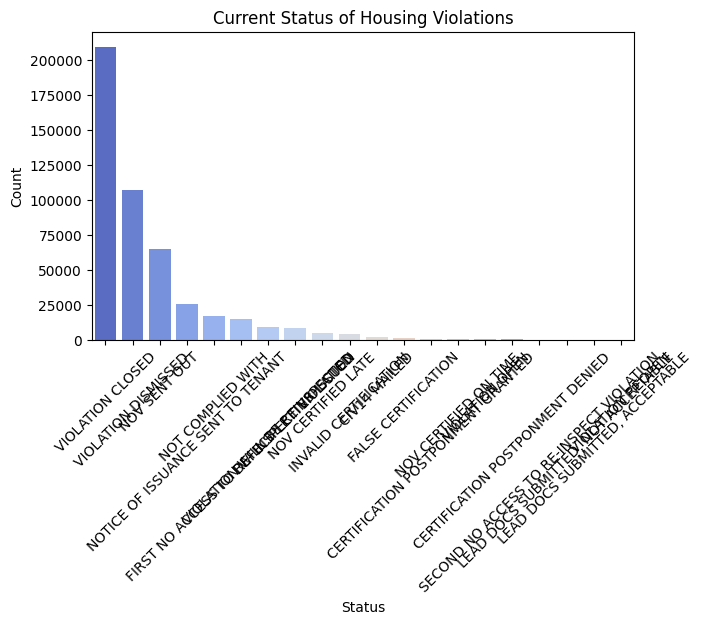

In [ ]:
query4 = """
SELECT current_status, COUNT(*) AS total_cases
FROM housing_violations
GROUP BY current_status
ORDER BY total_cases DESC;
"""
status = pd.read_sql(query4, conn)

plt.figure(figsize=(7,4))
sns.barplot(x='current_status', y='total_cases', data=status, palette='coolwarm')
plt.title("Current Status of Housing Violations")
plt.xlabel("Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


Majority of cases are closed, but a non-trivial share remains open, indicating room for faster resolution.